In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pylab as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

import math
import sys
%matplotlib inline
sns.set()

In [19]:
# train = pd.read_csv('../train.csv')
# test = pd.read_csv('../test.csv')

train = pd.read_csv('../train/2train1.csv')
test = pd.read_csv('../test/2test1.csv')


In [20]:
# train

In [21]:
# pred_value = pd.read_csv('../sales_Cust_kankou_event/result_mean.csv')
# pred_value = pd.read_csv('../sales_Cust_kankou_event/result_median.csv')

pred_value = pd.read_csv('../result/result_mean.csv')


In [22]:
pred = pred_value.iloc[:,1]

In [23]:
all_time = pd.concat([train.iloc[:,[0,2]], test.iloc[:,[0,2]]], axis=0) #訓練データ＋テストデータ

dayadd_pred = pd.concat([test.iloc[:,0], pred], axis=1) #date列と予測値を結合

In [24]:
all_time

,date,CustNum
0,2017-07-08,334.0
1,2017-07-09,393.0
2,2017-07-10,220.0
3,2017-07-11,196.0
4,2017-07-12,152.0
...,...,...
55,2019-09-01,388.0
56,2019-09-02,254.0
57,2019-09-03,198.0
58,2019-09-04,189.0


In [25]:
# date列をタイムスタンプ型に
def timestamp_data(df):
    index_lst = [] 
    for i in df['date']:
        index_lst.append(pd.to_datetime(i)) 
    split_df = pd.DataFrame(list(zip(index_lst,df.iloc[:,1])), columns = ['date','CustNum'])
    return split_df, index_lst


In [26]:
all_time, all_index = timestamp_data(all_time)
dayadd_pred, test_index = timestamp_data(dayadd_pred)

In [27]:
# dateをインデックスに割り当て
all_time = all_time.set_index('date')
dayadd_pred = dayadd_pred.set_index('date')

In [ ]:
dayadd_pred

(array([17348., 17440., 17532., 17622., 17713., 17805., 17897., 17987.,
        18078., 18170.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

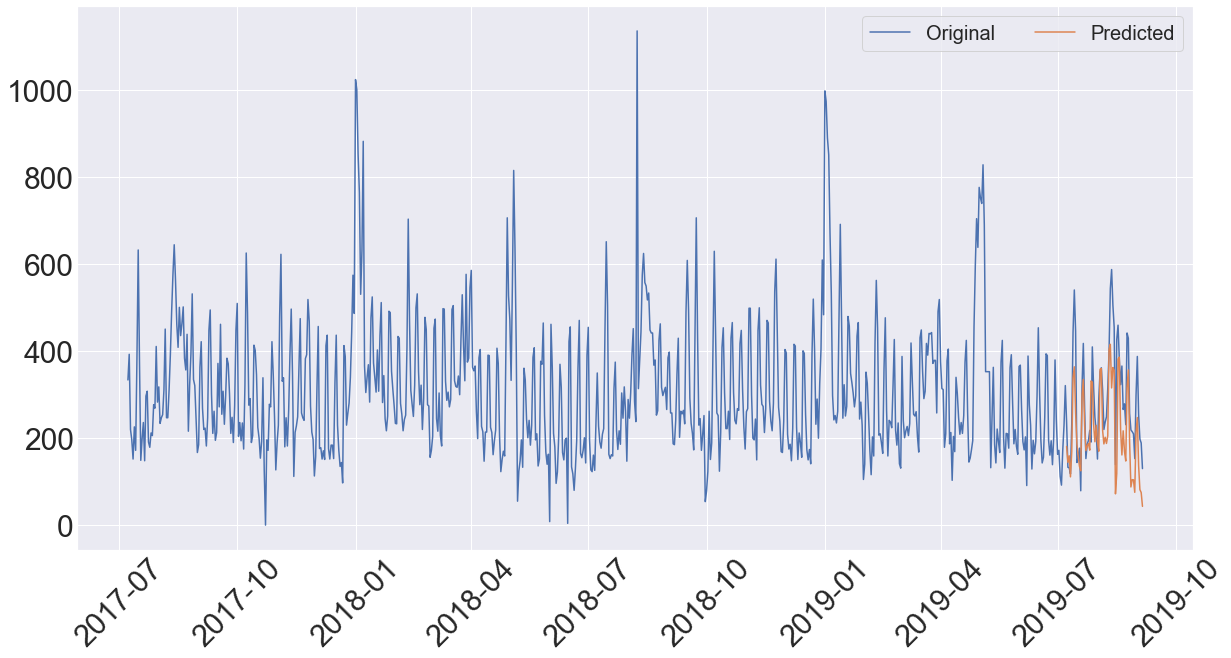

In [29]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_time, label='Original')
plt.plot(dayadd_pred,label='Predicted')

# sxmin='2020-02-15'
# sxmax='2020-10-12'

# xmin = datetime.datetime.strptime(sxmin, '%Y-%m-%d')
# xmax = datetime.datetime.strptime(sxmax, '%Y-%m-%d')
# plt.xlim([xmin,xmax])

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

### テスト期間だけ

In [30]:
test2 = test.iloc[:,[0,2]]

test2, test_index = timestamp_data(test2)
test2 = test2.set_index('date')


(array([18085., 18092., 18099., 18109., 18116., 18123., 18130., 18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

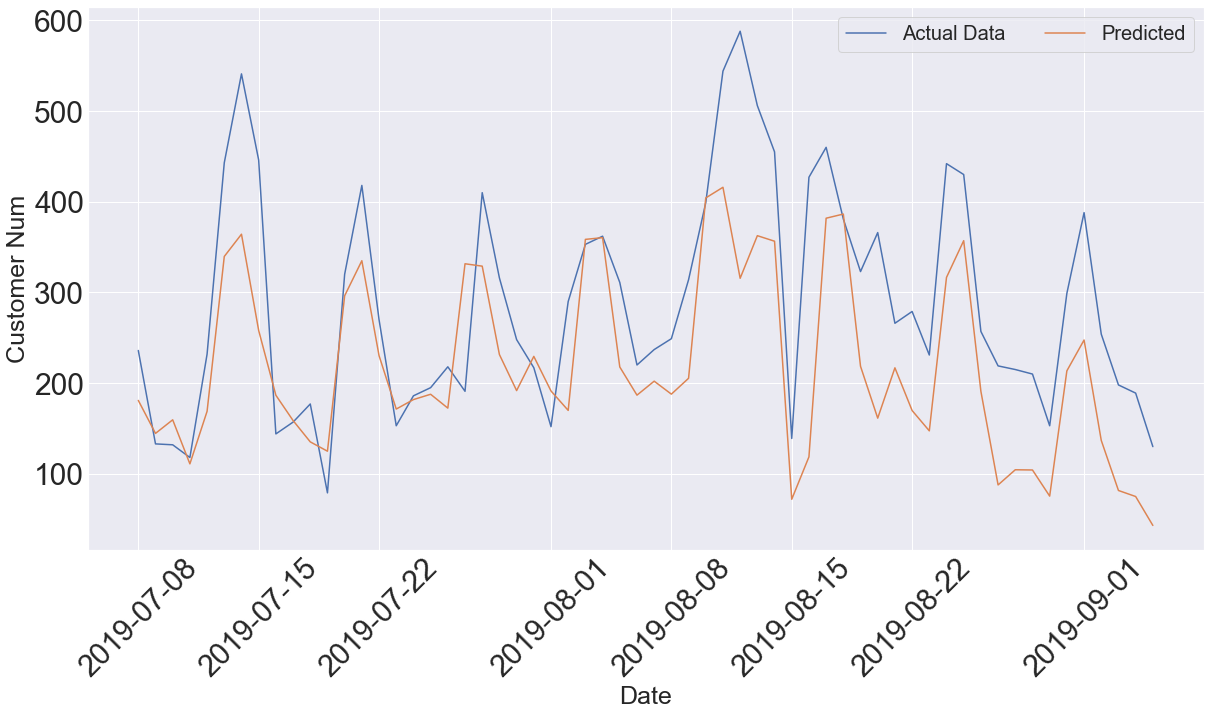

In [32]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(test2, label='Actual Data')
plt.plot(dayadd_pred,label='Predicted')

plt.xlabel("Date",fontsize=25)
plt.ylabel("Customer Num",fontsize=25)

plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

In [33]:
# test

### 信頼区間

In [35]:
Interval = pd.read_csv('../result/Interval.csv')
Interval = Interval.T
Interval = Interval.iloc[1:,:]
Interval = Interval.set_axis(list(range(60)), axis=0)

In [36]:
Interval2 = pd.DataFrame(list(zip(test_index,Interval.iloc[:,0],Interval.iloc[:,1])), columns = ['date','low','high'])
Interval2 = Interval2.set_index('date')

In [37]:
Interval2

,low,high
date,,
2019-07-08,-10.856187,360.752139
2019-07-09,-67.725863,325.909594
2019-07-10,-69.767519,386.073910
2019-07-11,-147.273287,357.762617
2019-07-12,-175.295846,443.235903
2019-07-13,-69.191024,606.611976
2019-07-14,-35.584343,636.560830
2019-07-15,-173.006424,545.735490
2019-07-16,-264.498307,501.348001


(array([18085., 18092., 18099., 18109., 18116., 18123., 18130., 18140.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

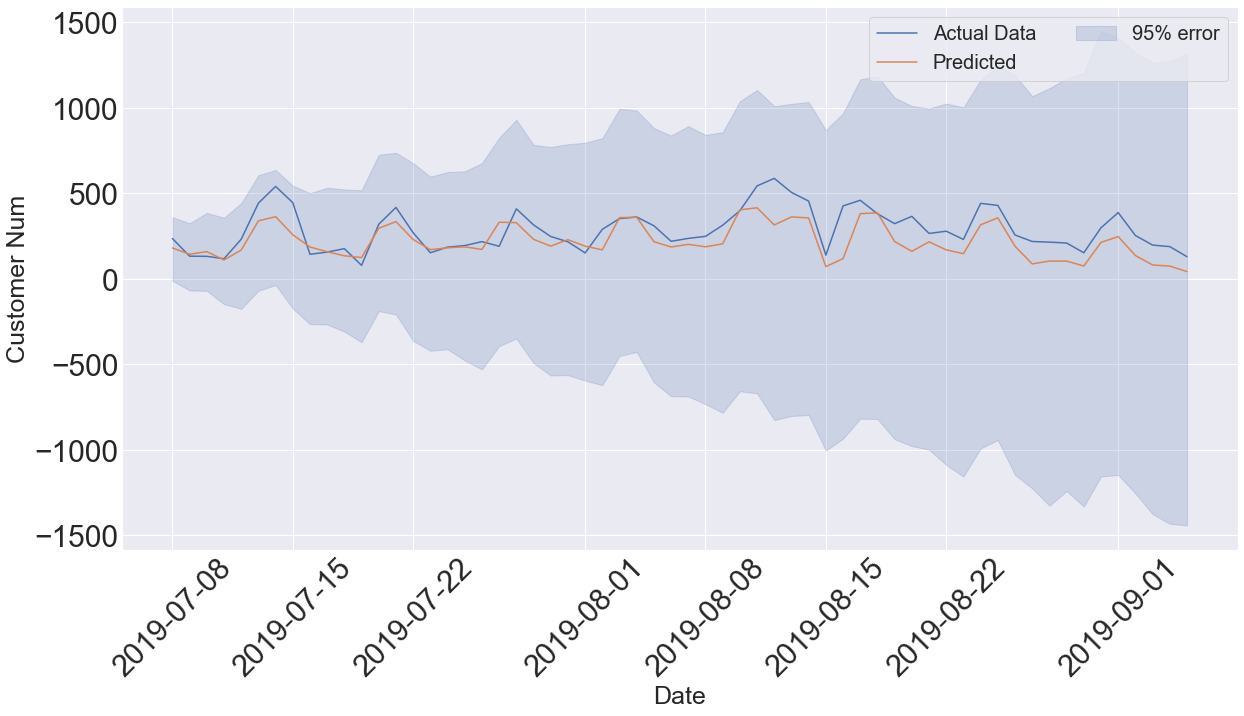

In [38]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(test2, label='Actual Data')
plt.plot(dayadd_pred,label='Predicted')
plt.fill_between(test_index,Interval2.iloc[:,0], Interval2.iloc[:,1], color='b', alpha=0.2,label='95% error')

plt.xlabel("Date",fontsize=25)
plt.ylabel("Customer Num",fontsize=25)
plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

# plt.plot(Interval2.iloc[:,1], 'k:')
# plt.plot(Interval2.iloc[:,0], 'k:')


(array([17348., 17440., 17532., 17622., 17713., 17805., 17897., 17987.,
        18078., 18170.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

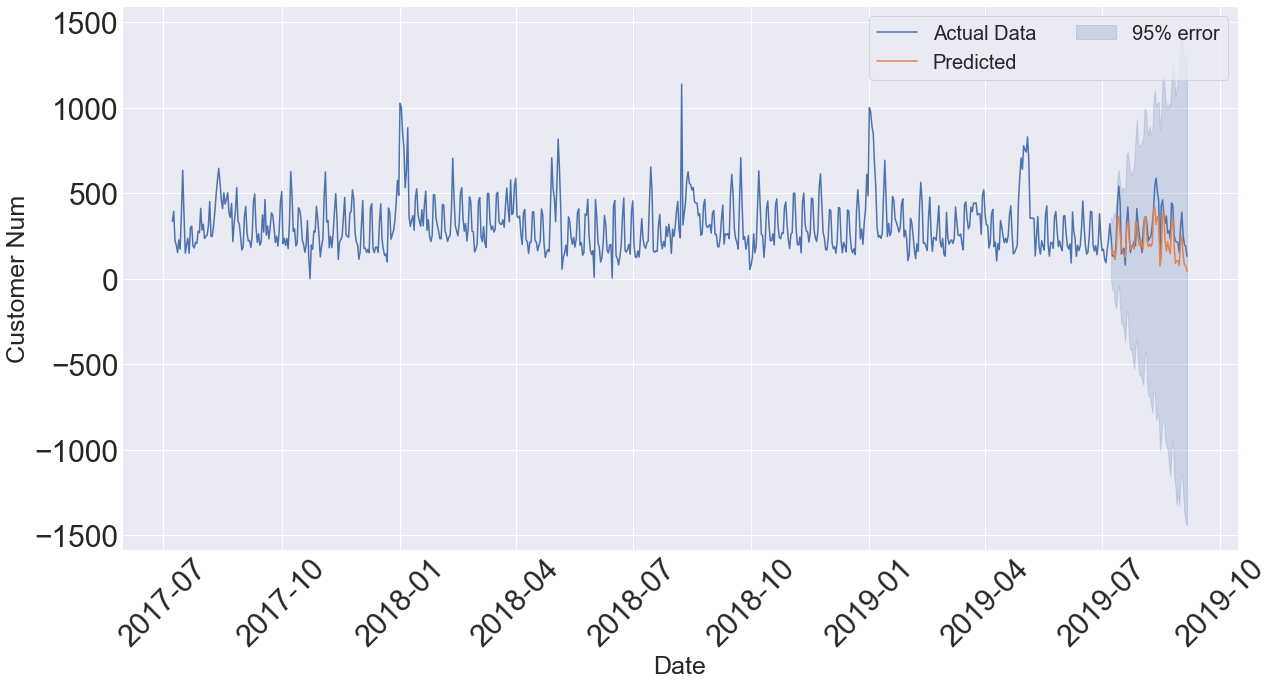

In [39]:
import datetime

fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(all_time, label='Actual Data')
plt.plot(dayadd_pred,label='Predicted')
plt.fill_between(test_index,Interval2.iloc[:,0], Interval2.iloc[:,1], color='b', alpha=0.2,label='95% error')

plt.xlabel("Date",fontsize=25)
plt.ylabel("Customer Num",fontsize=25)
plt.tick_params(length=0)
plt.legend(fontsize=20,ncol=2)
plt.tick_params(labelsize=30)
plt.xticks(rotation=45)
# fig.savefig("lgbm_predict.png",bbox_inches="tight")

# plt.plot(Interval2.iloc[:,1], 'k:')
# plt.plot(Interval2.iloc[:,0], 'k:')
